## Load Data

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Load the Dataset
titanic = pd.read_csv('titanic.csv')

## Data Exploration

In [39]:
# Display the first few rows of the dataset
print("First 5 rows of the dataset:\n", titanic.head())

# Check the shape of the dataset (rows, columns)
print("\nShape of the dataset:", titanic.shape)

# Display the column names
print("\nColumn names in the dataset:\n", titanic.columns)

# Display the data types of each column
print("\nData types of each column:\n", titanic.dtypes)

# Check for unique values in categorical columns
categorical_columns = titanic.select_dtypes(include=['object']).columns
for col in categorical_columns:
    print(f"\nUnique values in '{col}':")
    print(titanic[col].unique())

# Display the number of unique values in each categorical column
print("\nNumber of unique values in each categorical column:")
for col in categorical_columns:
    print(f"{col}: {titanic[col].nunique()}")

# Check for missing values
print("\nMissing values in each column:\n", titanic.isnull().sum())

# Display summary statistics for numerical columns
print("\nSummary statistics for numerical columns:\n", titanic.describe())

First 5 rows of the dataset:
    PassengerId  Survived  Pclass  \
0          892         0       3   
1          893         1       3   
2          894         0       2   
3          895         0       3   
4          896         1       3   

                                           Name     Sex   Age  SibSp  Parch  \
0                              Kelly, Mr. James    male  34.5      0      0   
1              Wilkes, Mrs. James (Ellen Needs)  female  47.0      1      0   
2                     Myles, Mr. Thomas Francis    male  62.0      0      0   
3                              Wirz, Mr. Albert    male  27.0      0      0   
4  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female  22.0      1      1   

    Ticket     Fare Cabin Embarked  
0   330911   7.8292   NaN        Q  
1   363272   7.0000   NaN        S  
2   240276   9.6875   NaN        Q  
3   315154   8.6625   NaN        S  
4  3101298  12.2875   NaN        S  

Shape of the dataset: (418, 12)

Column names in the da

## Data Visualization

#### Exploratory Data Analysis (EDA)

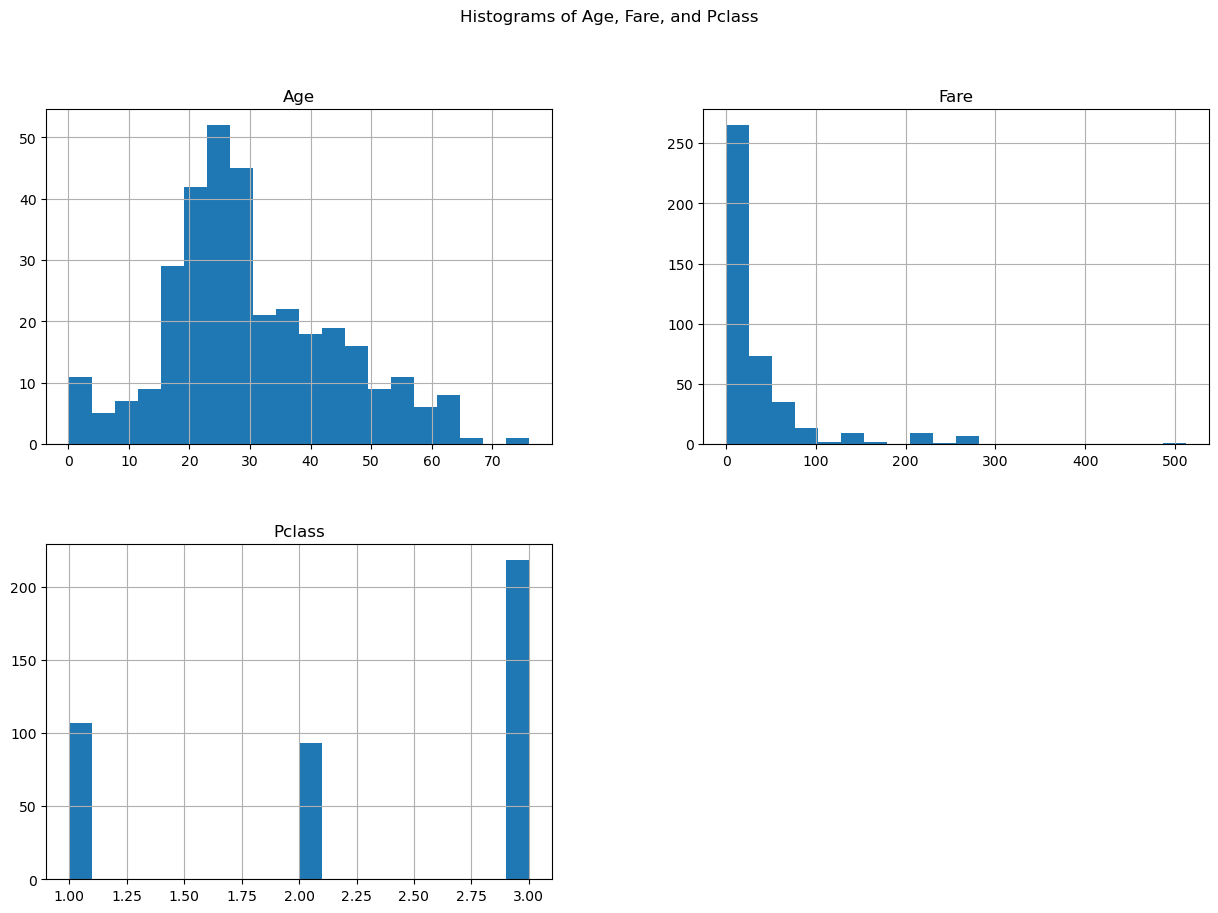

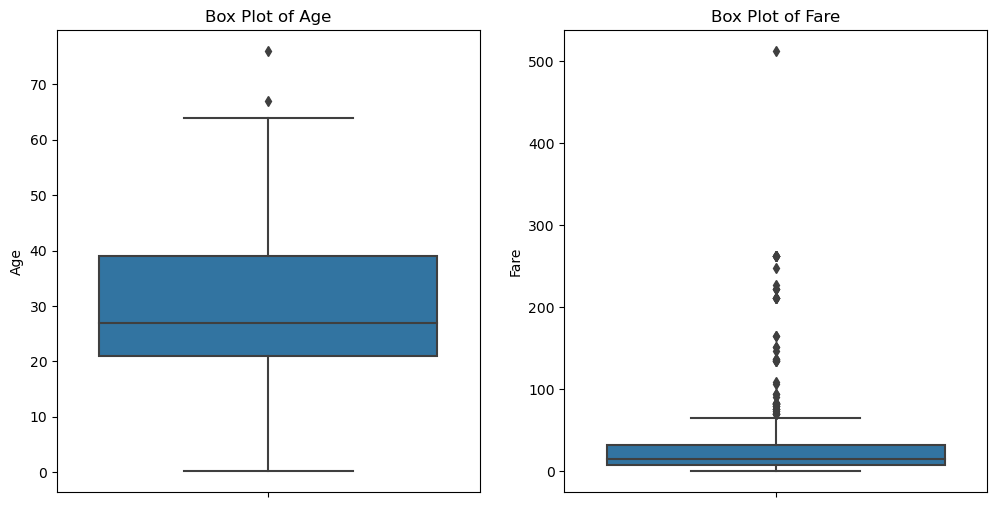

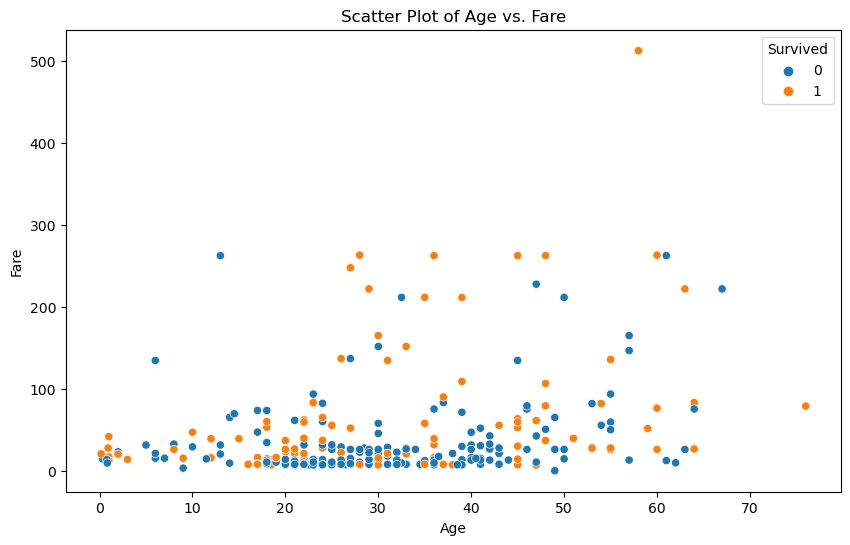

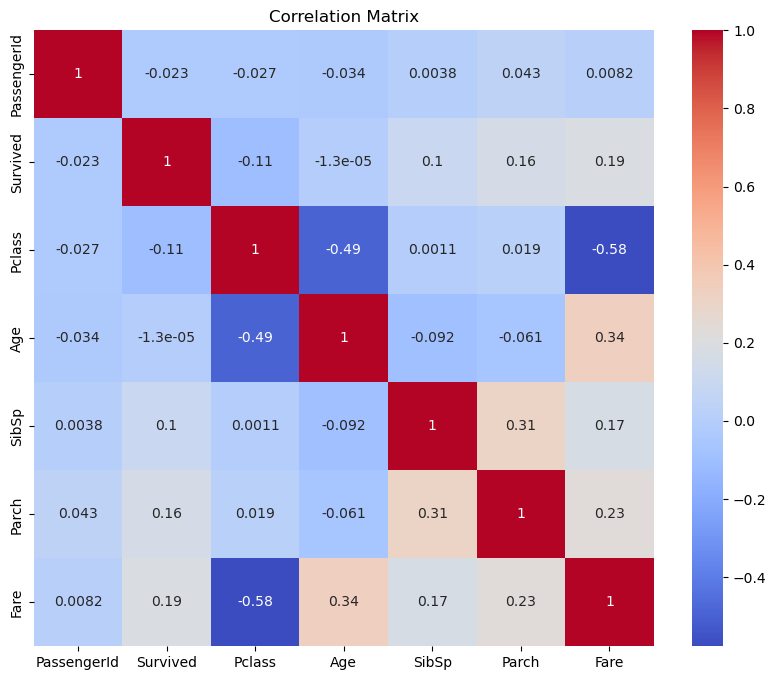

In [15]:
# Histograms for Age, Fare, and Pclass
titanic[['Age', 'Fare', 'Pclass']].hist(bins=20, figsize=(15, 10))
plt.suptitle('Histograms of Age, Fare, and Pclass')
plt.show()

# Box plots for Age and Fare to detect outliers
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.boxplot(y=titanic['Age'])
plt.title('Box Plot of Age')

plt.subplot(1, 2, 2)
sns.boxplot(y=titanic['Fare'])
plt.title('Box Plot of Fare')
plt.show()

# Scatter plot of Age vs. Fare, colored by Survived
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age', y='Fare', hue='Survived', data=titanic)
plt.title('Scatter Plot of Age vs. Fare')
plt.show()

# Selecting only the numeric columns for correlation
numeric_columns = titanic.select_dtypes(include=['float64', 'int64']).columns

# Correlation heatmap
plt.figure(figsize=(10,8))
sns.heatmap(titanic[numeric_columns].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


#### Visualize Missing Values

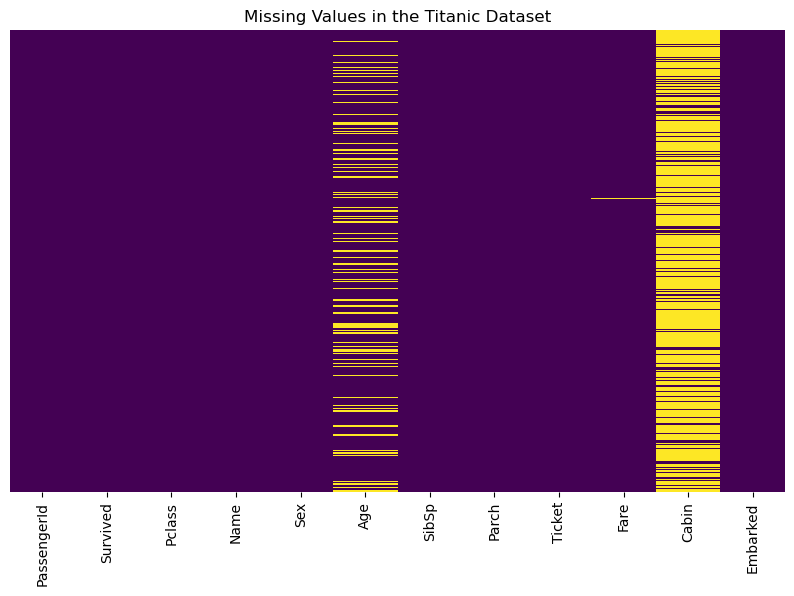

In [16]:
# Visualize Missing Values
plt.figure(figsize=(10, 6))
sns.heatmap(titanic.isnull(), yticklabels=False, cbar=False, cmap='viridis')
plt.title('Missing Values in the Titanic Dataset')
plt.show()

#### Handle Missing Values

In [18]:
# Replace missing values in the 'Age' column with the median of the column
titanic['Age'] = titanic['Age'].fillna(titanic['Age'].median())

# Replace missing values in the 'Fare' column with the median of the column
titanic['Fare'] = titanic['Fare'].fillna(titanic['Fare'].median())

# Drop the 'Cabin' column due to excessive missing values
titanic = titanic.drop(columns=['Cabin'])

#### Handle Outliers

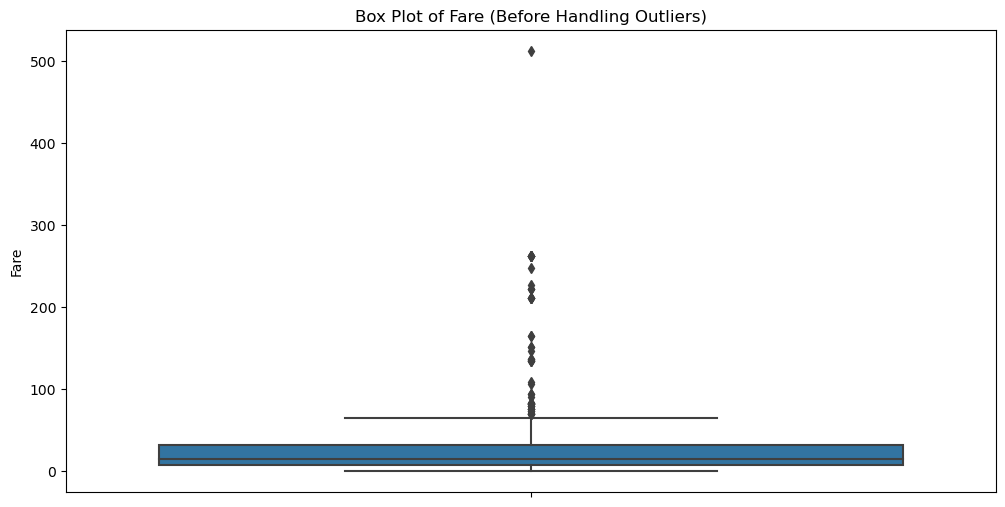

In [41]:
# Visualization of Outliers Before Handling
plt.figure(figsize=(12, 6))
sns.boxplot(y=titanic['Fare'])
plt.title('Box Plot of Fare (Before Handling Outliers)')
plt.show()

# Detect and handle outliers in the 'Fare' column using the IQR method
Q1 = titanic['Fare'].quantile(0.25)
Q3 = titanic['Fare'].quantile(0.75)
IQR = Q3 - Q1

# Define the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
fare_outliers = titanic['Fare'][(titanic['Fare'] < lower_bound) | (titanic['Fare'] > upper_bound)]

# Replace outliers with the median of the column
titanic.loc[fare_outliers.index, 'Fare'] = titanic['Fare'].median()

#### Data Transformation

In [33]:
# One-hot encoding for 'Sex' and 'Embarked' columns
titanic = pd.get_dummies(titanic, columns=['Sex', 'Embarked'], drop_first=True)

# Scaling 'Age' and 'Fare' columns
scaler = StandardScaler()
titanic[['Age', 'Fare']] = scaler.fit_transform(titanic[['Age', 'Fare']])

## Model Building

In [35]:
# Splitting the dataset into train and test sets
X = titanic.drop(columns=['Survived', 'PassengerId', 'Name', 'Ticket'])
y = titanic['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initializing and training the Logistic Regression model
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

## Model Prediction and Evaluation

In [37]:
# Making predictions on the test set
y_pred_log_reg = log_reg.predict(X_test)

# Evaluating the Logistic Regression model
log_reg_metrics = {
    'Accuracy': accuracy_score(y_test, y_pred_log_reg),
    'Precision': precision_score(y_test, y_pred_log_reg),
    'Recall': recall_score(y_test, y_pred_log_reg),
    'F1-Score': f1_score(y_test, y_pred_log_reg),
    'Confusion Matrix': confusion_matrix(y_test, y_pred_log_reg)
}

# Print the evaluation metrics
print("Logistic Regression Model Performance Metrics:\n")
for metric, value in log_reg_metrics.items():
    if metric == 'Confusion Matrix':
        print(f"{metric}:\n{value}")
    else:
        print(f"{metric}: {value:.4f}")

Logistic Regression Model Performance Metrics:

Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1-Score: 1.0000
Confusion Matrix:
[[50  0]
 [ 0 34]]


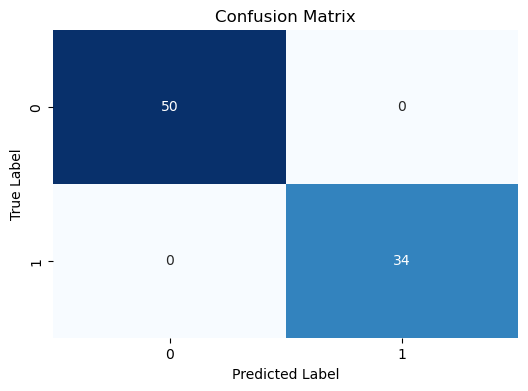

In [53]:
# Predict on the test set
y_pred = model.predict(X_test)

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix using seaborn's heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()
